# Habitable planets using Simple Neural Network (using Pytorch)

This notebook is based upon a notebook as part of the Deep Learning & NLP course by Thu Vu. I just made adoptions for the Habitable planet dataset. I've also added a plot function of the loss data during training.

I'm using `conda` environment `Pytorch 2 (python 3.12)` (i.e. Apple Silicon, pytorch on GPU)

**TODO** 
1. √ apply neural network on astronominal project: Habital/non-habital planets
2. √ check if GPU is used -> NO, only variable device set to "mps" (MacOS)
3. use GPU on MacOS: transport data to and from GPU

</br>Original notebook © Thu Vu. All rights reserved.
<hr>

## Install libraries

2025-06 PP: I'm using my conda environment `Pytorch2 (Python 3.12)` which contains a Pytorch version for MacOS

In [1]:
# Install the libraries we are going to use
#PP modified: ! pip install numpy pandas torch

In [2]:
# What version of Python and Pytorch do you have?
# is GPU available?
import sys
import platform
import torch
import pandas as pd
import numpy as np

has_gpu = torch.cuda.is_available()
# PP DEPRECATED: has_mps = getattr(torch,'has_mps',False)
has_mps = torch.backends.mps.is_built()
# PP DEPRECATED: device = "mps" if getattr(torch,'has_mps',False) \
device = "mps" if has_mps \
    else "gpu" if has_gpu else "cpu"

print(f"Python Platform: {platform.platform()}")
print(f"PyTorch Version: {torch.__version__}")
print()
print(f"Python {sys.version}")
print(f"Pandas {pd.__version__}")
print(f"Numpy {np.__version__}")
print("GPU is", "available" if has_gpu else "NOT AVAILABLE")
print("MPS (Apple Metal) is", "AVAILABLE" if has_mps else "NOT AVAILABLE")
print(f"Target device is {device}")

Python Platform: macOS-15.5-arm64-arm-64bit
PyTorch Version: 2.5.1

Python 3.12.8 | packaged by Anaconda, Inc. | (main, Dec 11 2024, 10:37:40) [Clang 14.0.6 ]
Pandas 2.2.3
Numpy 1.26.4
GPU is NOT AVAILABLE
MPS (Apple Metal) is AVAILABLE
Target device is mps


## 1: Loading the Data
We will use a small dataset called `HPLearningSet.csv` that contains information about habitable and non-habitable planets.

In [3]:
import pandas as pd

# Load the dataset
#PP modified: data = pd.read_csv('data/flower_data_train.csv')
data = pd.read_csv("data/HPLearningSet.csv")
data = data.drop(data.columns[0], axis=1) #We want to drop the first column of the file
print(f"Dataset dimensions: {data.shape}")
data.head(10)

Dataset dimensions: (18, 5)


,P_NAME,S_MASS,P_PERIOD,P_DISTANCE,P_HABITABLE
0,Kepler-736 b,0.86,3.601472,0.043718,0
1,Kepler-636 b,0.85,16.080661,0.118082,0
2,Kepler-887 c,1.19,7.638460,0.080420,0
3,Kepler-442 b,0.61,112.305300,0.409327,1
4,Kepler-772 b,0.98,12.992073,0.107408,0
5,Teegarden's Star b,0.09,4.910000,0.025200,1
6,K2-116 b,0.69,4.655411,0.048086,0
7,GJ 1061 c,0.12,6.689000,0.035000,1
8,HD 68402 b,1.12,1103.000000,2.180981,0
9,Kepler-1544 b,0.81,168.811170,0.557107,1


## 2: Data Preprocessing
We need to preprocess the data:
1. remove column P_NAME
2. extract the features (S_MASS and P_PERIOD) and labesl

In [4]:
# drop the names of planets
data = data.drop(['P_NAME'], axis=1) 
#df_train.drop(['P_NAME','P_HABITABLE'],axis=1)
# Extract features and labels
X = data[['S_MASS', 'P_PERIOD']].values
y = data['P_HABITABLE'].values
print(f"first 5 features:{X[:5]}\nfirst 5 Labels:{y[:5]}")

first 5 features:[[  0.86        3.601472 ]
 [  0.85       16.080661 ]
 [  1.19        7.6384602]
 [  0.61      112.3053   ]
 [  0.98       12.992073 ]]
first 5 Labels:[0 0 0 1 0]


## 3. Implementing the Neural Network using PyTorch

Note: class `SimpleNeuralNetwork` created by Thu Vu. 
In addition to applying a simple neural network, I plot the loss values calculated during the training.
The arrays `epochs` and `loss_data` are added to the training cycle to collect the data for the plot.

In [5]:
# PP added plot libraries
import matplotlib
import matplotlib.pyplot as plt

In [6]:
# PP add plot loss
def plot_loss_data(epochs, loss, save_plot=False):
    """
    plot_loss_data() - make a nice plot of loss data during training
    
    Arguments
        - epochs - array of epoches
        - loss - array of loss values, calculated during training
        - save_plot, bool: True - save plot in file, default=False
    """
    color = '#FF0000'
    marker = 'o'
    size = 5
    plt.scatter(epochs, loss,
            c=color,
            marker=marker,
            s=size,
            label="Loss",
            alpha=0.7,
            linewidth=2)  # Make the markers thicker
    
    #plt.title('Planet Distribution', pad=20, size=12)
    plt.xlabel('Epoch', size=20)
    plt.ylabel('Loss', size=20)
    plt.legend(title='Loss during training', title_fontsize=12, fontsize=12, loc="upper right")

    # Add grid for better readability
    plt.grid(True, linestyle='--', alpha=0.7)

    if save_plot:
        plt.savefig('images/Loss.png', dpi=300)
        print("Saved plot 'images/Loss.png'")

Target device is mps
Epoch 0, Loss: 0.84344881772995
Epoch 10, Loss: 0.7256026864051819
Epoch 20, Loss: 0.7185568809509277
Epoch 30, Loss: 0.7146365642547607
Epoch 40, Loss: 0.7114204168319702
Epoch 50, Loss: 0.7085993885993958
Epoch 60, Loss: 0.706070601940155
Epoch 70, Loss: 0.7037830352783203
Epoch 80, Loss: 0.7017039060592651
Epoch 90, Loss: 0.6998094320297241
Epoch 100, Loss: 0.6980800032615662
Epoch 110, Loss: 0.6964995861053467
Epoch 120, Loss: 0.6950541734695435
Epoch 130, Loss: 0.6937312483787537
Epoch 140, Loss: 0.6925197839736938
Epoch 150, Loss: 0.6914100050926208
Epoch 160, Loss: 0.6903927326202393
Epoch 170, Loss: 0.6894600987434387
Epoch 180, Loss: 0.6886046528816223
Epoch 190, Loss: 0.6878199577331543
Epoch 200, Loss: 0.687099814414978
Epoch 210, Loss: 0.6864386796951294
Epoch 220, Loss: 0.6858315467834473
Epoch 230, Loss: 0.6852739453315735
Epoch 240, Loss: 0.6847615838050842
Epoch 250, Loss: 0.6842905879020691
Epoch 260, Loss: 0.6838573813438416
Epoch 270, Loss: 0.683

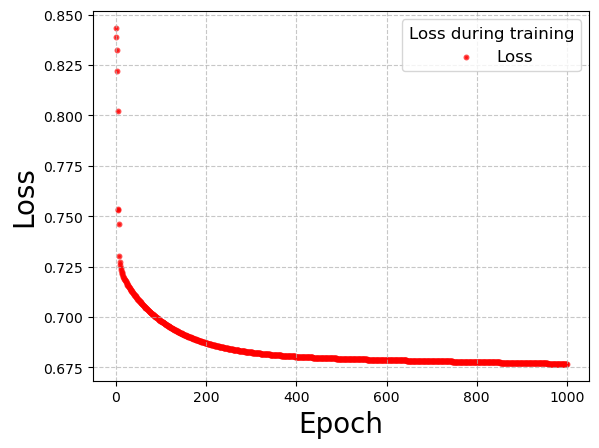

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim

# 2025-0605 PP: added device specification (mps: Apple Silicon GPU)
device = "mps" if torch.backends.mps.is_built() \
    else "gpu" if torch.cuda.is_available() else "cpu"
print(f"Target device is {device}")

# PP TODO: in order to do the calculations on GPU, data needs to be transported to and from GPU

# Convert data to PyTorch tensors
X_tensor = torch.tensor(X, dtype=torch.float32)  # TODO: device=device, 
y_tensor = torch.tensor(y, dtype=torch.float32).unsqueeze(1)  # TODO: device=device, 


# Define the neural network class
class SimpleNeuralNetwork(nn.Module):
    def __init__(self):
        super(SimpleNeuralNetwork, self).__init__()
        self.hidden = nn.Linear(2, 2)
        self.output = nn.Linear(2, 1)

    def forward(self, x):
        x = torch.sigmoid(self.hidden(x))
        x = torch.sigmoid(self.output(x))
        return x

# Initialize the model, loss function, and optimizer with learning rate = 0.01
model = SimpleNeuralNetwork()
criterion = nn.BCELoss()  # Binary cross-entropy loss
optimizer = optim.SGD(model.parameters(), lr=0.01)  # Stochastic Gradient Descent

# Training loop
# 2025-0605 PP: added two arrays to plot the loss data lateron
epochs = []     # collect the epoch
loss_data = []  # collect the calculated loss value

# PP added max and print epochs
epoch_max, epoch_print = 1_000, 10
#epoch_max, epoch_print = 1_000_000, 100_000

# PP modified: for epoch in range(1000):
for epoch in range(epoch_max):
    # Forward pass
    outputs = model(X_tensor)
    loss = criterion(outputs, y_tensor)

    # Backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # PP added: save epoch and loss data
    epochs.append(epoch)
    loss_data.append(loss.item())

    # print loss value every 'epoch_print' epochs
    # PP modified: if epoch % 10 == 0:
    if epoch % epoch_print == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')

# generate plot diagram of loss values durng the training
print("Loss diagram")
print(f"number of epochs     : {len(epochs)}")
print(f"number of loss values: {len(loss_data)}")
plot_loss_data(epochs, loss_data, save_plot=True)

<hr>

### Activation Function
We will use the sigmoid function:
$$
sigmoid(x) = \frac{1}{1 + e^{-x}}
$$

### Cross-Entropy Loss
The cross-entropy loss is given by the formula:
$$
L = -\frac{1}{N} \sum \left[ y_{\text{true}} \log(y_{\text{pred}}) + (1 - y_{\text{true}}) \log(1 - y_{\text{pred}}) \right]
$$

where:
- N is the number of samples
- y_true are the true labels (0 or 1)
- y_pred are the predicted probabilities (between 0 and 1)

<div class="alert alert-block alert-info">

**📘 NOTE: Derivative of the cross-entropy loss (L) with respect to the prediction (y_pred)**

Given the binary cross-entropy loss:

$$
L = -\frac{1}{N} \sum \left[ y_{\text{true}} \log(y_{\text{pred}}) + (1 - y_{\text{true}}) \log(1 - y_{\text{pred}}) \right]
$$

For a single training example (drop the summation and $\frac{1}{N}$):

$$
L = - \left[ y_{\text{true}} \log(y_{\text{pred}}) + (1 - y_{\text{true}}) \log(1 - y_{\text{pred}}) \right]
$$


Take the derivative with respect to $y_{\text{pred}}$:

$$
\frac{\partial L}{\partial y_{\text{pred}}} = - \left( \frac{y_{\text{true}}}{y_{\text{pred}}} - \frac{1 - y_{\text{true}}}{1 - y_{\text{pred}}} \right)
$$

Hence, in our code above, we wrote:

d_L_d_ypred = - (y_true / y_pred - (1 - y_true) / (1 - y_pred))
</div>